# Prediction Process for Trained Machine Learning Models

## Overview
This notebook is designed to load multiple pre-trained machine learning models and make predictions on a test dataset. We work with different models trained on variations of the data, and we apply transformations to get predictions in the original scale where necessary.
We have identified and exported the best models for each pre-processing technique in the `models.ipynb` file. Now we will try to predict the test data using each of these models to determine which pre-processing technique works the best. 

### Objectives
1. Load the test dataset.
2. Load the pre-trained models.
3. Make predictions using each model.
4. Compare models to find which approach performs the best

---

##  Import Necessary Libraries




In [1]:
import pandas as pd     #Used for Data Manipulation
import numpy as np      #Used for Data Manipulation
import seaborn as sns   #Visualization  
import joblib           #Model loading  
import os

from sklearn.linear_model import LinearRegression    #ML model
from sklearn.ensemble import RandomForestRegressor   #ML model
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor                     #ML model
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score #Metrics for potential model evaluation
from sklearn.model_selection import GridSearchCV

%matplotlib inline
import matplotlib as mpl #Visualization
import matplotlib.pyplot as plt #Visualization
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

### **Importing test data**

In [2]:
test = pd.read_csv('./data/test.csv')

### **Separate Features and Labels**

In [3]:
xtest, ytest = test.drop('charges', axis=1), test[['charges']] # xtest contains all input features, and ytest contains the target variable "charges" for evaluation if needed

### **Load Pre-Trained Models**

In [4]:
model_original = joblib.load('data/models/best_model_original.pkl') # Model trained on untransformed data
model_log = joblib.load('data/models/best_model_log.pkl')           # Model trained on log-transformed target variable (charges) 
model_smokers = joblib.load('data/models/best_model_smokers.pkl')   # Model trained specifically for smoker data 
model_smokers_squared = joblib.load('data/models/best_model_smokers_squared.pkl') # Model trained on squared target variable data

### **Make Predictions Using the Loaded Models**

In [5]:
predictions_original = model_original.predict(xtest) #  Direct predictions on xtest
predictions_log = np.exp(model_log.predict(xtest))   #  Since the model was trained on a log-transformed target, np.exp() is applied to revert predictions back to the original scale
predictions_smokers = model_smokers.predict(xtest)   #  Direct predictions for smoker-specific data, no transformation applied
predictions_smokers_squared = np.pow(model_smokers_squared.predict(xtest), 2)  #  Predictions are squared (np.power(..., 2)) to revert to the original scale for the squared-transformed target

In [6]:
rmse_original = root_mean_squared_error(ytest, predictions_original)
mae_original = mean_absolute_error(ytest, predictions_original)
print(f"RMSE: {rmse_original}")
print(f"MAE: {mae_original}")

RMSE: 4271.3615673287595
MAE: 2378.792094330748


<function matplotlib.pyplot.show(close=None, block=None)>

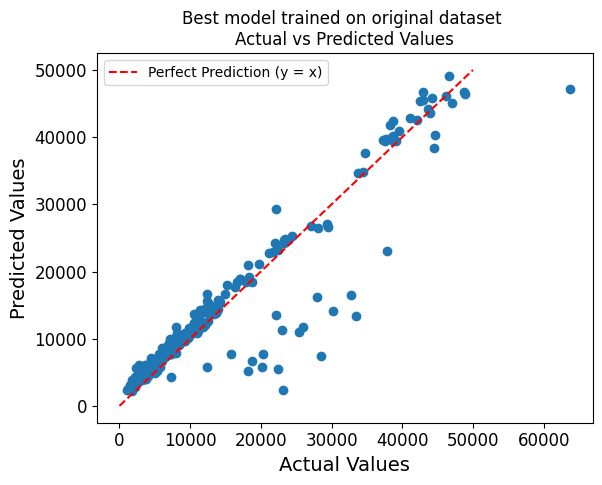

In [7]:
plt.plot(ytest, predictions_original, 'o')

# Adding a perfect prediction line (y = x)
x = np.linspace(0, 50000, 100)
y = x

plt.plot(x, y, 'r--', label='Perfect Prediction (y = x)')

plt.title('Best model trained on original dataset \nActual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show

The scatter plot shows a strong positive correlation between actual and predicted XGboost values, with most points clustering along the diagonal, indicating good model performance. Some deviations, especially at higher values, suggest areas where predictions are less accurate. 


In [8]:
rmse_log = root_mean_squared_error(ytest, predictions_log)
mae_log = mean_absolute_error(ytest, predictions_log)
print(f"RMSE: {rmse_log}")
print(f"MAE: {mae_log}")

RMSE: 4399.804258414521
MAE: 1952.1872365342817


<function matplotlib.pyplot.show(close=None, block=None)>

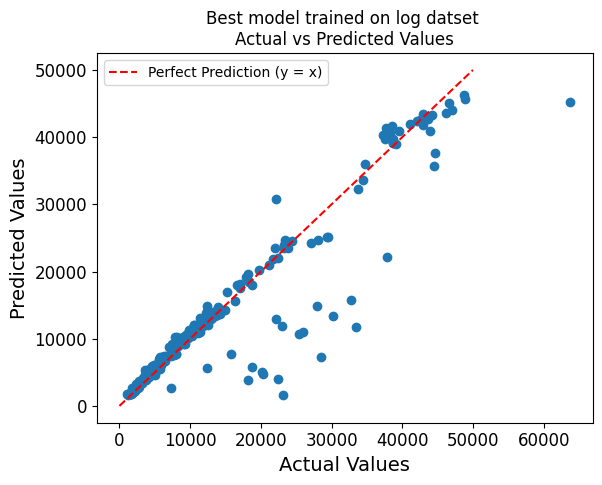

In [9]:
plt.plot(ytest, predictions_log, 'o')

# Adding a perfect prediction line (y = x)
x = np.linspace(0, 50000, 100)
y = x

plt.plot(x, y, 'r--', label='Perfect Prediction (y = x)')

plt.title('Best model trained on log datset \nActual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show

Scatter plot of actual versus predicted values for the log-transformed model. Points clustering around the diagonal line indicate accurate predictions, while deviations from the line highlight instances where the model under- or over-predicts. This plot suggests the model generally captures the trend but shows variability in predictions at higher values.

In [10]:
rmse_smokers = root_mean_squared_error(ytest, predictions_smokers)
mae_smokers = mean_absolute_error(ytest, predictions_smokers)
print(f"RMSE: {rmse_smokers}")
print(f"MAE: {mae_smokers}")

RMSE: 4567.515417252636
MAE: 2628.3545745815936


<function matplotlib.pyplot.show(close=None, block=None)>

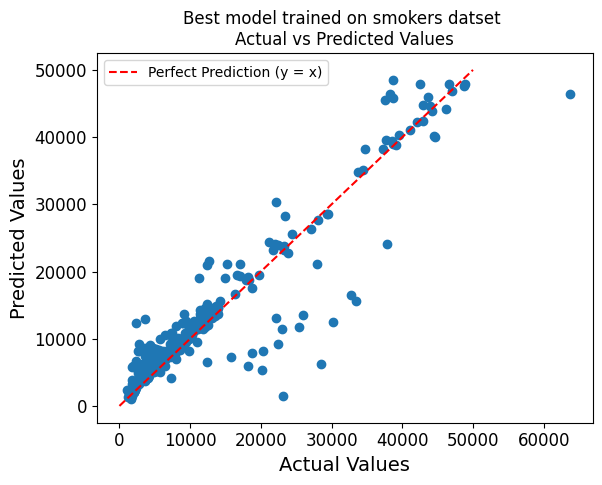

In [11]:
plt.plot(ytest, predictions_smokers, 'o')

# Adding a perfect prediction line (y = x)
x = np.linspace(0, 50000, 100)
y = x

plt.plot(x, y, 'r--', label='Perfect Prediction (y = x)')

plt.title('Best model trained on smokers datset \nActual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show

Scatter plot of actual versus predicted values for the smoker-specific model. Most predictions align closely with the diagonal line, indicating good accuracy, especially for lower values. However, there is some dispersion and underestimation for higher values, suggesting potential challenges in accurately modeling the upper range of costs for smokers

In [12]:
rmse_smokers_squared = root_mean_squared_error(ytest, predictions_smokers_squared)
mae_smokers_squared = mean_absolute_error(ytest, predictions_smokers_squared)
print(f"RMSE: {rmse_smokers_squared}")
print(f"MAE: {mae_smokers_squared}")

RMSE: 4226.588349016118
MAE: 2191.8666011216474


<function matplotlib.pyplot.show(close=None, block=None)>

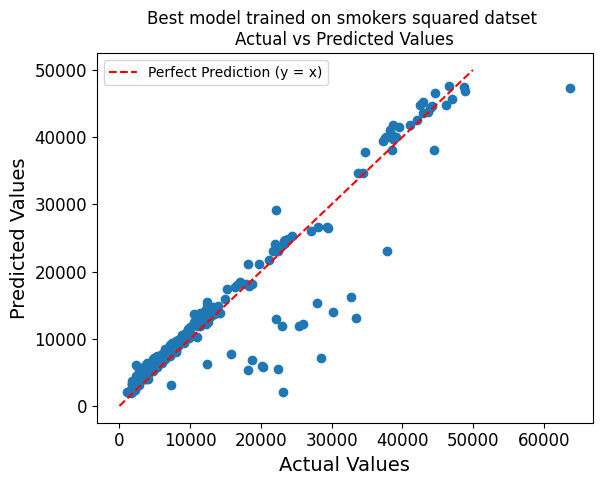

In [13]:
plt.plot(ytest, predictions_smokers_squared, 'o')

# Adding a perfect prediction line (y = x)
x = np.linspace(0, 50000, 100)
y = x

plt.plot(x, y, 'r--', label='Perfect Prediction (y = x)')

plt.title('Best model trained on smokers squared datset \nActual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show

Scatter plot of actual versus predicted values for the smoker-specific model with squared transformation. The points are closely aligned along the diagonal, indicating accurate predictions overall. This alignment suggests that the squared transformation may have helped the model handle higher cost values more effectively, though some variability still exists at the upper end

# **Conclusion**

Finally, we can see that the best way of predicting the insurance charges is by **training an XGBoost model** on a pre-processed dataset using **oversampling to balance the smokers** and **applying the root function to the charges to have a better distribution**.


We ended up with an **RMSE of 4226.6** which is pretty good given some kaggle results we have seen. Some were using Polynomial Regression on the un-processed dataset and got an RMSE of 4346.9. Other have used a basic Linear Regression approach without any pre-processing and got an RMSE of 5642.4.

Reference results:
 - https://www.kaggle.com/code/ruslankl/health-care-cost-prediction-w-linear-regression
 - https://www.kaggle.com/code/mariapushkareva/medical-insurance-cost-with-linear-regression

### **Future improvements**
A recommendation to improve the project would be to include more models to see if there are models that react better to the datasets. In our case XGBoost preformed the best in 3/4 cases. Another suggestion could be to include more parametres in the grid seach for a more optimized outcome. 